<a href="https://colab.research.google.com/github/lfernandodiniz/alura_vox_challengedatascience/blob/master/semana2/semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/lfernandodiniz/alura_vox_challengedatascience/blob/master/Semana1/Data_Tratado_Churn.csv

# Importando as bibliotecas necessárias
import pandas as pd,numpy as np, seaborn as sns

In [ ]:
# Visualizando os dados
df = pd.read_csv('/content/Data_Tratado_Churn.csv')
df

,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,...,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes,Contrato,Cobrança_Digital,Método_de_Pagamento,Cobrança_Mensal,Cobrança_Total,Contas_Diárias
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.60,593.30,2.19
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.90,542.40,2.00
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.90,280.85,2.46
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.00,1237.85,3.27
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Não,Feminino,Não,Não,Não,13,Sim,Não,DSL,...,Não,Sim,Não,Não,Anual,Não,Cheque enviado,55.15,742.90,1.84
7039,9992-RRAMN,Sim,Masculino,Não,Sim,Não,22,Sim,Sim,Fibra óptica,...,Não,Não,Não,Sim,Mensal,Sim,Cheque eletrônico,85.10,1873.70,2.84
7040,9992-UJOEL,Não,Masculino,Não,Não,Não,2,Sim,Não,DSL,...,Não,Não,Não,Não,Mensal,Sim,Cheque enviado,50.30,92.75,1.68
7041,9993-LHIEB,Não,Masculino,Não,Sim,Sim,67,Sim,Não,DSL,...,Sim,Sim,Não,Sim,Dois anos,Não,Cheque enviado,67.85,4627.65,2.26


# Analise Churn Sim, ou seja pessoas que sairam da empresa

In [ ]:
churn_sim = df[df.Churn == "Sim"]
churn_sim.shape

(1869, 22)

In [ ]:
churn_nao = df[df.Churn == "Não"]
churn_nao.shape

(5174, 22)

In [ ]:
churn_sim.head(3)

,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,...,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes,Contrato,Cobrança_Digital,Método_de_Pagamento,Cobrança_Mensal,Cobrança_Total,Contas_Diárias
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.9,280.85,2.46
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.0,1237.85,3.27
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.9,267.40,2.80


##Analise tempo de contrato para Churn = sim, ou seja que sairam da empresa.

In [ ]:
churn_sim.Tempo_de_Contrato.describe()



count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tempo_de_Contrato, dtype: float64

###Grafico Tempo de contrato

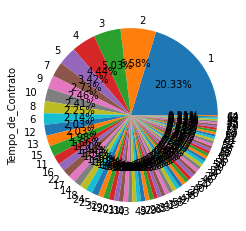

In [ ]:
churn_sim.Tempo_de_Contrato.value_counts().plot(kind = 'pie', autopct='%.2f%%')



> 20 % (maior valor dos qe sairam da empresa, tinham 1 mes de contratos quando resolveram sair).

In [ ]:
cont_tempo_contrato = churn_sim.Tempo_de_Contrato.value_counts()
cont_tempo_contrato


1     380
2     123
3      94
4      83
5      64
     ... 
45      6
44      6
62      5
63      4
64      4
Name: Tempo_de_Contrato, Length: 72, dtype: int64

In [ ]:
analise_contrato = cont_tempo_contrato / len(churn_sim.Tempo_de_Contrato)
analise_contrato

1     0.203317
2     0.065811
3     0.050294
4     0.044409
5     0.034243
        ...   
45    0.003210
44    0.003210
62    0.002675
63    0.002140
64    0.002140
Name: Tempo_de_Contrato, Length: 72, dtype: float64

In [ ]:
analise_contrato = pd.DataFrame(analise_contrato)
analise_contrato

,Tempo_de_Contrato
1,0.203317
2,0.065811
3,0.050294
4,0.044409
5,0.034243
...,...
45,0.003210
44,0.003210
62,0.002675
63,0.002140


In [ ]:
cont_tempo_contrato = pd.DataFrame(cont_tempo_contrato)
cont_tempo_contrato


,Tempo_de_Contrato
1,380
2,123
3,94
4,83
5,64
...,...
45,6
44,6
62,5
63,4


In [ ]:
Contrato_analise = pd.concat([cont_tempo_contrato, analise_contrato],axis=1)
Contrato_analise

,Tempo_de_Contrato,Tempo_de_Contrato
1,380,0.203317
2,123,0.065811
3,94,0.050294
4,83,0.044409
5,64,0.034243
...,...,...
45,6,0.003210
44,6,0.003210
62,5,0.002675
63,4,0.002140


In [ ]:
#Contrato_analise.rename(columns= {'Tempo_de_Contrato':'Tempo_de_Contrato', 'Tempo_de_Contrato':'Porcentagem'}, inplace=True)
Contrato_analise.columns = ['Tempo_de_Contrato','Porcentagem']
Contrato_analise.Porcentagem = Contrato_analise.Porcentagem.round(2)

In [ ]:
Contrato_analise

,Tempo_de_Contrato,Porcentagem
1,380,0.20
2,123,0.07
3,94,0.05
4,83,0.04
5,64,0.03
...,...,...
45,6,0.00
44,6,0.00
62,5,0.00
63,4,0.00


## Analise Genero

In [ ]:
churn_sim

,ID_Cliente,Churn,Gênero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,...,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes,Contrato,Cobrança_Digital,Método_de_Pagamento,Cobrança_Mensal,Cobrança_Total,Contas_Diárias
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.90,280.85,2.46
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.00,1237.85,3.27
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.90,267.40,2.80
18,0022-TCJCI,Sim,Masculino,Sim,Não,Não,45,Sim,Não,DSL,...,Sim,Não,Não,Sim,Anual,Não,Cartão de crédito (automático),62.70,2791.50,2.09
19,0023-HGHWL,Sim,Masculino,Sim,Não,Não,1,Não,Sem serviço telefônico,DSL,...,Não,Não,Não,Não,Mensal,Sim,Cheque eletrônico,25.10,25.10,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,9961-JBNMK,Sim,Masculino,Sim,Não,Não,21,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Transferência bancária (automático),96.80,2030.30,3.23
7023,9965-YOKZB,Sim,Masculino,Sim,Não,Não,9,Sim,Sim,Fibra óptica,...,Não,Não,Não,Sim,Mensal,Sim,Cheque eletrônico,83.85,790.15,2.80
7036,9985-MWVIX,Sim,Feminino,Não,Não,Não,1,Sim,Não,Fibra óptica,...,Não,Não,Não,Não,Mensal,Sim,Cheque enviado,70.15,70.15,2.34
7037,9986-BONCE,Sim,Feminino,Não,Não,Não,4,Sim,Não,Não,...,No internet service,No internet service,No internet service,No internet service,Mensal,Não,Transferência bancária (automático),20.95,85.50,0.70


### Grafico Genero dos que sairam

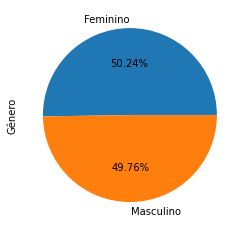

In [ ]:
churn_sim.Gênero.value_counts().plot(kind = 'pie', autopct='%.2f%%')

A porcentagem entre homens e mulheres são praticamente a mesma.

## Analise Dos Idosos que deixaram a empresa

### Grafico dos Idosos (maiores de 65 anos) que sairam da empresa

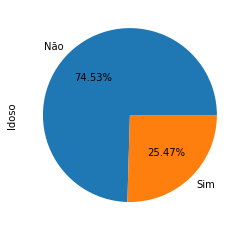

In [ ]:
churn_sim.Idoso.value_counts().plot(kind = 'pie', autopct='%.2f%%')

> Os Idosos sao 75 % dos que sairam da empresa

## Analise dos Clientes com Conjugues que deixaram a empresa

### Grafico dos Clientes com Conjugues ou Parceiros

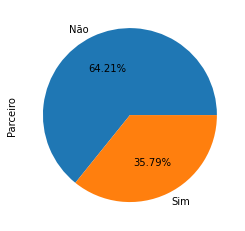

In [ ]:
churn_sim.Parceiro.value_counts().plot(kind = 'pie', autopct='%.2f%%')

> A maioria 64% dos que sairam não possuem conjugues ou parceiro.

## Analise dos que possuem dependentes

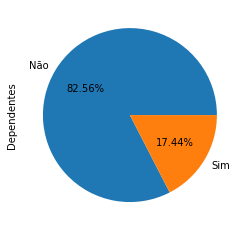

In [ ]:
churn_sim.Dependentes.value_counts().plot(kind = 'pie', autopct='%.2f%%')

> A maioria 83 % não possuem dependentes

## Analise de Serviços que as pessoas possuiam

In [ ]:
churn_sim.columns

Index(['ID_Cliente', 'Churn', 'Gênero', 'Idoso', 'Parceiro', 'Dependentes',
       'Tempo_de_Contrato', 'Serviço_Telefônico', 'Linhas_Múltiplas',
       'Serviço_Internet', 'Segurança_Online', 'Backup_Online',
       'Proteção_de_Dispositivo', 'Suporte_Técnico', 'Streaming_TV',
       'Streaming_de_Filmes', 'Contrato', 'Cobrança_Digital',
       'Método_de_Pagamento', 'Cobrança_Mensal', 'Cobrança_Total',
       'Contas_Diárias'],
      dtype='object')

In [ ]:
analise_servicos = churn_sim.loc[:, ['Serviço_Telefônico','Linhas_Múltiplas','Serviço_Internet','Segurança_Online', 'Backup_Online',
       'Proteção_de_Dispositivo', 'Suporte_Técnico', 'Streaming_TV',
       'Streaming_de_Filmes']]
analise_servicos

,Serviço_Telefônico,Linhas_Múltiplas,Serviço_Internet,Segurança_Online,Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Streaming_TV,Streaming_de_Filmes
2,Sim,Não,Fibra óptica,No,Não,Sim,Não,Não,Não
3,Sim,Não,Fibra óptica,No,Sim,Sim,Não,Sim,Sim
4,Sim,Não,Fibra óptica,No,Não,Não,Sim,Sim,Não
18,Sim,Não,DSL,Yes,Não,Sim,Não,Não,Sim
19,Não,Sem serviço telefônico,DSL,No,Não,Não,Não,Não,Não
...,...,...,...,...,...,...,...,...,...
7020,Sim,Não,Fibra óptica,No,Não,Sim,Não,Sim,Sim
7023,Sim,Sim,Fibra óptica,No,Não,Não,Não,Não,Sim
7036,Sim,Não,Fibra óptica,No,Não,Não,Não,Não,Não
7037,Sim,Não,Não,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


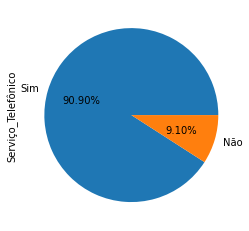

In [ ]:
analise_servicos.Serviço_Telefônico.value_counts().plot(kind = 'pie', autopct='%.2f%%')

A Maioria dos que sairam possuem serviço Telefônico

### Grafico dos clientes que possuiam multiplas linhas telefonicas

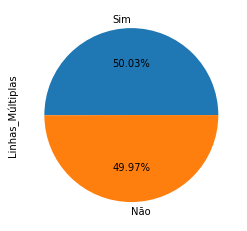

In [ ]:
analise_servicos.query('Serviço_Telefônico == "Sim"').Linhas_Múltiplas.value_counts().plot(kind = 'pie', autopct='%.2f%%')
#analise_servicos.Serviço_Telefônico.value_counts().plot(kind = 'pie', autopct='%.2f%%')


> Metade das pessoas possuiam linhas multiplas 50,03%

## Grafico linha telefonica e serviços de internet

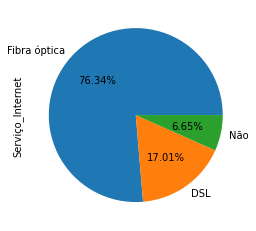

In [ ]:
analise_servicos.query('Serviço_Telefônico == "Sim"').Serviço_Internet.value_counts().plot(kind = 'pie', autopct='%.2f%%')






>76 % dos que possuiam linha telefonica tbm possuiam fibra optica